# DSCI 503 – Project 03
### Matt Snyder

In [1]:
import numpy as np               
import pandas as pd              
import matplotlib.pyplot as plt

## Part 1: Loading the Dataset; Preliminary Analysis
Look at the shape of the dataset, and distribution of values in the columns

In [2]:
diamonds = pd.read_csv('diamonds.txt', sep='\t')
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


### Size of Data
Determine the size of the dataset

In [3]:
diamonds.shape

(53940, 10)

### Distribution of Data
Inspect the distribution of the columns in diamonds

In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Part 2: Filtering and Sorting
Start by viewing information about the 5 most expensive diamonds in the dataset.

In [5]:
# Select the columns price, carat, cut, color, and clarity from diamonds.
# Sort the resulting DataFrame by price, in descending order.
# Use head() to display the first five rows of the result.
diamonds.loc[:, ['price', 'carat', 'cut', 'color', 'clarity']].sort_values(by='price', ascending=False).head(5)

,price,carat,cut,color,clarity
27750,18823,2.29,Premium,I,VS2
27749,18818,2.00,Very Good,G,SI1
27748,18806,1.51,Ideal,G,IF
27747,18804,2.07,Ideal,G,SI2
27746,18803,2.00,Very Good,H,SI1


Next, view information about the 5 least expensive diamonds in the dataset

In [6]:
# Select the columns price, carat, cut, color, and clarity from diamonds.
# Sort the resulting DataFrame by price, in ascending order.
# Use head() to display the first five rows of the result.
diamonds.loc[:, ['price', 'carat', 'cut', 'color', 'clarity']].sort_values(by='price', ascending=True).head(5)

,price,carat,cut,color,clarity
1,326,0.23,Ideal,E,SI2
2,326,0.21,Premium,E,SI1
3,327,0.23,Good,E,VS1
4,334,0.29,Premium,I,VS2
5,335,0.31,Good,J,SI2


Next, view information about the 5 largest diamonds in the dataset with an ideal cut.

In [7]:
# Select the columns price, carat, cut, color, and clarity from diamonds.
# Use boolean masking to filter the DataFrame, keeping only records for diamonds with an ideal cut.
# Sort the resulting DataFrame by carat, in descending order.
# Use head() to display the first five rows of the result.
diamonds.loc[diamonds.cut == 'Ideal', \
    ['price', 'carat', 'cut', 'color', 'clarity']].sort_values(by='carat', ascending=False).head(5)

,price,carat,cut,color,clarity
24329,12587,3.50,Ideal,H,I1
24298,12545,3.22,Ideal,I,I1
26468,16037,3.01,Ideal,J,SI2
26745,16538,3.01,Ideal,J,I1
24785,13156,2.75,Ideal,D,I1


Next, view information about the 5 largest diamonds in the dataset with an fair cut

In [8]:
# Select the columns price, carat, cut, color, and clarity from diamonds.
# Use boolean masking to filter the DataFrame, keeping only records for diamonds with an fair cut.
# Sort the resulting DataFrame by carat, in descending order.
# Use head() to display the first five rows of the result.
diamonds.loc[diamonds.cut == 'Fair', \
    ['price', 'carat', 'cut', 'color', 'clarity']].sort_values(by='carat', ascending=False).head(5)

,price,carat,cut,color,clarity
27416,18018,5.01,Fair,J,I1
27631,18531,4.50,Fair,J,I1
27131,17329,4.13,Fair,H,I1
23645,11668,3.65,Fair,H,I1
26432,15964,3.40,Fair,D,I1


## Part 3: Working with Categorical Variables
Configure dataframe with information about ordering of the categorical columns, and make color palettes for the columns

In [9]:
# Create three lists named clarity_levels, cut_levels, and color_levels. Each list should contain strings
# representing the levels of the associated categorical variable in order from worst to best.
# clarity - Indicates the level of internal defects in the diamond. The levels (from worst to best) are: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF.
clarity_levels = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
# cut - Quality of the cut of the diamond. The levels (from worst to best) are Fair, Good, Very Good, Premium, and Ideal
cut_levels = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
# color - Level of the tint in the diamond. Colorless diamonds are generally preferred. The levels of this variable (from worst to best) are: J, I, H, G, F, E, and D.
color_levels = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

### Set Categorial Ordering in Dataframe
Use ordered lists of category strings to communicate to Pandas the correct order for the levels of the three categorical variables.

In [10]:
# Use pd.Categorical() to set the levels of the cut, color, and clarity columns. This will require three calls to pd.Categorical().
diamonds.clarity = pd.Categorical(diamonds.clarity, clarity_levels)
diamonds.cut = pd.Categorical(diamonds.cut, cut_levels)
diamonds.color = pd.Categorical(diamonds.color, color_levels)

### Create Lists of Colors
Create lists of named colors to serve as palettes to be used for visualizations

In [11]:
# Create three lists named clarity_pal, color_pal, and cut_pal. Each list should contain a number of named colors
# equal to the number of levels found for the associated categorical variable. 
print (f'clarity {len(clarity_levels)} cut {len(cut_levels)} color {len(color_levels)}')
clarity_pal = ['gold', 'peachpuff', 'dodgerblue', 'lightseagreen', 'powderblue', 'deepskyblue', 'aqua', 'hotpink']
color_pal = ['cornsilk', 'gold', 'yellow', 'palegreen', 'limegreen', 'lightseagreen', 'aqua']
cut_pal = ['thistle', 'hotpink', 'magenta', 'blue', 'royalblue']

clarity 8 cut 5 color 7


## Part 4: Displaying Counts for Categorical Variables
Start by counting the number of diamonds for each level of cut

In [12]:
# Without creating any new DataFrame variables, select the cut column from diamonds, and then call its
# value_counts() method, followed by the sort_index() method. Display the result.
diamonds.cut.value_counts().sort_index().head()

cut
Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
Name: count, dtype: int64

Next, count the number of diamonds for each level of color.

In [13]:
# Without creating any new DataFrame variables, select the color column from diamonds, and then call its
# value_counts() method, followed by the sort_index() method. Display the result.
diamonds.color.value_counts().sort_index().head()

color
J     2808
I     5422
H     8304
G    11292
F     9542
Name: count, dtype: int64

Next, count the number of diamonds for each level of clarity.

In [14]:
# Without creating any new DataFrame variables, select the clarity column from diamonds, and then call its
# value_counts() method, followed by the sort_index() method. Display the result.
diamonds.clarity.value_counts().sort_index().head()

clarity
I1       741
SI2     9194
SI1    13065
VS2    12258
VS1     8171
Name: count, dtype: int64

## Part 5: Scatterplots of Price Against Carat

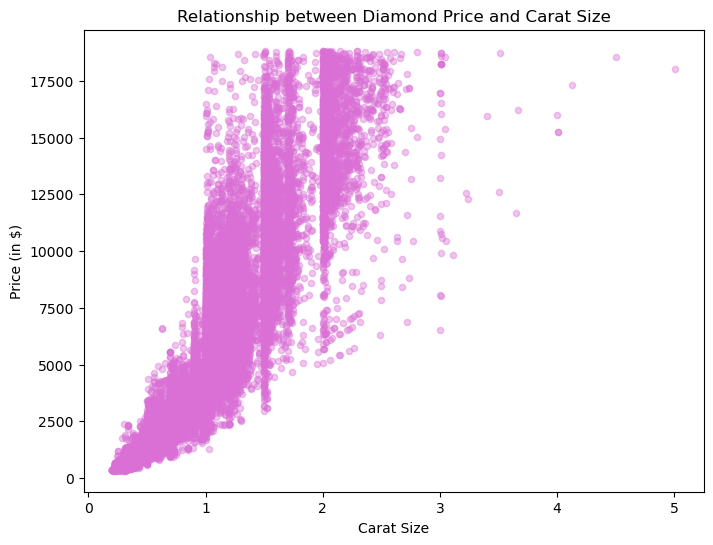

In [15]:
# Create a scatterplot of price against carat according to the following specifications:
# Set the figure size to [8,6].
plt.figure(figsize=[8,6])

# Set a point size of 20 and an alpha level of 0.4.
# Select a named single color for the points.
plt.scatter(x=diamonds.carat, y=diamonds.price, s=20, alpha=0.4, color='orchid')

# The x-axis should be labeled "Carat Size".
plt.xlabel('Carat Size')

# The y-axis should be labeled "Price (in $)".
plt.ylabel('Price (in $)')

# The figure should be title "Relationship between Diamond Price and Carat Size".
plt.title('Relationship between Diamond Price and Carat Size')

# Display the figure using plt.show().
plt.show()

### Price Against Carat Scatterplot, Colored by Clarity
Reproduce the plot from above, but will now color the points according to their clarity.

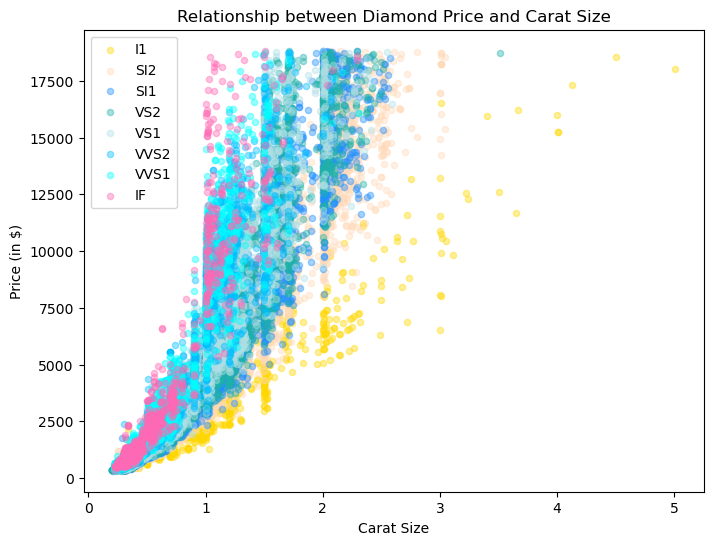

In [16]:
# Loop over the previously defined clarity_levels list and adding a new scatterplot to the figure for each item in
# clarity_levels. The colors of the points associated with each level of clarity should be set according to the clarity_pal list.
plt.figure(figsize=[8,6])
for i, clarity in enumerate(clarity_levels):
    sel = diamonds.clarity == clarity
    plt.scatter(x=diamonds.loc[sel,'carat'], y=diamonds.loc[sel, 'price'], s=20, alpha=0.4, color=clarity_pal[i], label=clarity)
plt.xlabel('Carat Size')
plt.ylabel('Price (in $)')
plt.title('Relationship between Diamond Price and Carat Size')

# Add a legend to the figure. 
plt.legend()

plt.show()

### Price Against Carat, Separated by Clarity
Separate the points for each of the eight clarity levels into its own subplot.

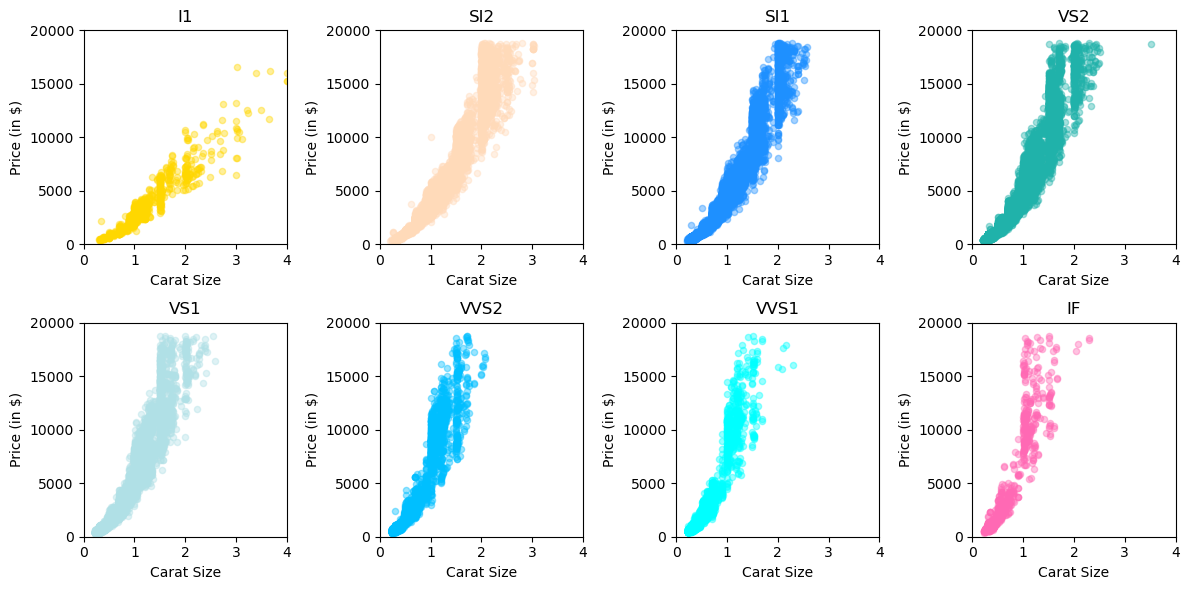

In [17]:
# Create a figure containing a 2x4 grid of subplots. 
# Set the figure size to [12,6].
plt.figure(figsize=[12,6])

# Each subplot should display a scatter plot for diamonds corresponding to exactly one of the levels of clarity. 
for i, clarity in enumerate(clarity_levels):
    plt.subplot(2,4,i+1)
    sel = diamonds.clarity == clarity
    # Set a point size of 20 and an alpha level of 0.4.
    # The points in each subplot have a fill color determined by the appropriate element of clarity_pal.
    plt.scatter(x=diamonds.loc[sel,'carat'], y=diamonds.loc[sel, 'price'], s=20, alpha=0.4, color=clarity_pal[i], label=clarity)
    # Within each subplot, the x-axis should be labeled "Carat Size" and the y-axis should be labeled "Price (in $)".
    plt.xlabel('Carat Size')
    plt.ylabel('Price (in $)')
    # The title of each subplot should be equal to the level of clarity being represented by that subplot.
    plt.title(clarity)
    # The x-limits of each subplot should be set to [0,4] and the y-limits should be set to [0,20000].
    plt.xlim([0, 4])
    plt.ylim([0, 20000])
    
# Call plt.tight_layout() and then display the figure using plt.show().
plt.tight_layout()
plt.show()

## Part 6: Applying Logarithmic Transformations
Starting by adding two new columns to the diamonds in order to store the transformed variables

In [18]:
# Add two new columns named ln_carat and ln_price to diamonds. The values stored in these columns should be the
# natural logarithms of the carat and price columns.
diamonds.loc[:, 'ln_carat'] = np.log(diamonds.carat)
diamonds.loc[:, 'ln_price'] = np.log(diamonds.price)

Continue by using histograms to explore the distribution of the diamond prices, and the log of the diamond prices.

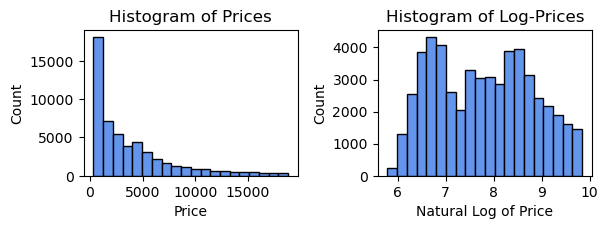

In [19]:
# Display two side-by-side histograms. The histogram on the left should be for price and the one on the right should be for ln_price. 
# Set the figure size to be [12,4].
plt.figure(figsize=[12,4])

plt.subplot(2,4,1)
# Label the x-axes as "Price"
plt.xlabel('Price')
# Label the y-axes as "Count".
plt.ylabel('Count')
# The plots should be titled "Histogram of Prices" 
plt.title('Histogram of Prices')
# In each plot, set the number of bins to 20.
# In each plot, set edgecolor to be black, and use a single named color for the bar colors.
plt.hist(diamonds.loc[:, 'price'], color='cornflowerblue', edgecolor='black', bins=20)

plt.subplot(2,4,2)
# and "Natural Log of Price". 
plt.xlabel('Natural Log of Price')
plt.ylabel('Count')
# and "Histogram of Log-Prices".
plt.title('Histogram of Log-Prices')
# In each plot, set the number of bins to 20.
# In each plot, set edgecolor to be black, and use a single named color for the bar colors.
plt.hist(diamonds.loc[:, 'ln_price'], color='cornflowerblue', edgecolor='black', bins=20)

# Display the figure using plt.show().
plt.tight_layout() # added because plots were overlapping
plt.show()

Continue by using histograms to explore the distribution of the carat sizes, and the log of the carat sizes.

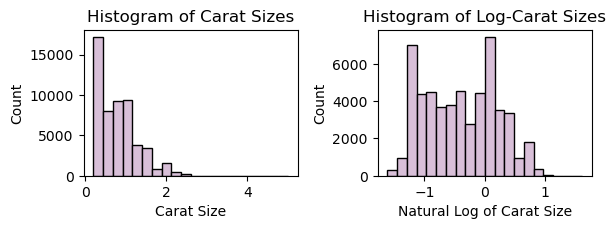

In [20]:
# Display two side-by-side histograms. The histogram on the left should be for carat and the one on the right should be
# for ln_carat. Create your figure according to the following specifications:
# • Set the figure size to be [12,4].
plt.figure(figsize=[12,4])

plt.subplot(2,4,1)
# Label the x-axes a "Carat Size"  
plt.xlabel('Carat Size')
# Label the y-axes as "Count".
plt.ylabel('Count')
# The plots should be titled "Histogram of Carat Sizes"
plt.title('Histogram of Carat Sizes')
# In each plot, set the number of bins to 20.
# In each plot, set edgecolor to be black, and use a single named color for the bar colors, different from the one used in the previous plot.
plt.hist(diamonds.loc[:, 'carat'], color='thistle', edgecolor='black', bins=20)

plt.subplot(2,4,2)
# and "Natural Log of Carat Size".
plt.xlabel('Natural Log of Carat Size')
# Label the y-axes as "Count".
plt.ylabel('Count')
# and "Histogram of Log-Carat Sizes"
plt.title('Histogram of Log-Carat Sizes')
# In each plot, set the number of bins to 20.
# In each plot, set edgecolor to be black, and use a single named color for the bar colors, different from the one used in the previous plot.
plt.hist(diamonds.loc[:, 'ln_carat'], color='thistle', edgecolor='black', bins=20)

# Display the figure using plt.show().
plt.tight_layout() # added because plots were overlapping
plt.show()

## Part 7: Scatterplot of Transformed Variables
Create a scatterplot of ln_price against ln_carat, with points colored according to their clarity.

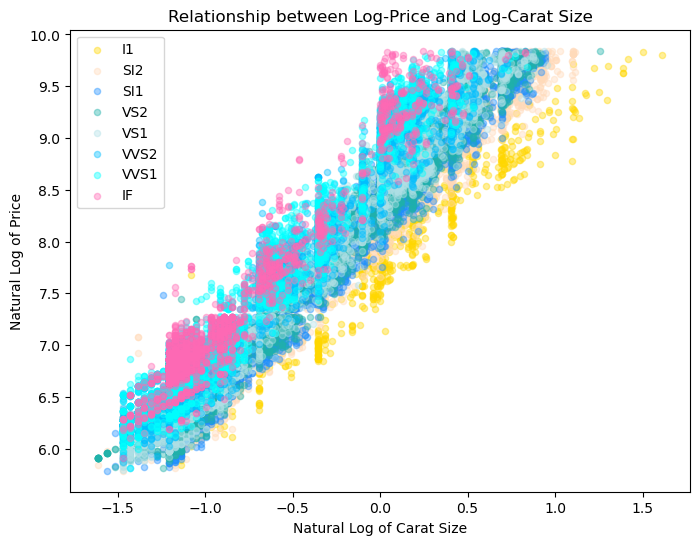

In [21]:
# Recreate the second figure from Part 5 (which contained a single scatter plot, with point colors determined by clarity),
# using ln_price and ln_carat instead of price and carat. 
plt.figure(figsize=[8,6])
for i, clarity in enumerate(clarity_levels):
    sel = diamonds.clarity == clarity
    plt.scatter(x=diamonds.loc[sel,'ln_carat'], y=diamonds.loc[sel, 'ln_price'], s=20, alpha=0.4, color=clarity_pal[i], label=clarity)

# The axes should be labeled "Natural Log of Carat Size" and "Natural Log of Prioe"
plt.xlabel('Natural Log of Carat Size')
plt.ylabel('Natural Log of Price')

# The title of the plot should be set to "Relationship between Log-Price and Log-Carat Size".
plt.title('Relationship between Log-Price and Log-Carat Size')

# Add a legend to the figure. 
plt.legend()

plt.show()

## Part 8: Grouping by Cut
Create a grouped DataFrame displaying the mean price and carat size for each cut level.

In [22]:
# Create a new DataFrame named gb_cut as follows: Select the cut, price, and carat columns from diamonds, group
# the result by cut, and then calculate the grouped means. 
gb_cut = diamonds.loc[:, ['cut', 'price', 'carat']].groupby(['cut'], observed=False).mean()

# Display the resulting DataFrame.
gb_cut

,price,carat
cut,,
Fair,4358.757764,1.046137
Good,3928.864452,0.849185
Very Good,3981.759891,0.806381
Premium,4584.257704,0.891955
Ideal,3457.541970,0.702837


Continue by using bar charts to graphically display the information from the DataFrame above.

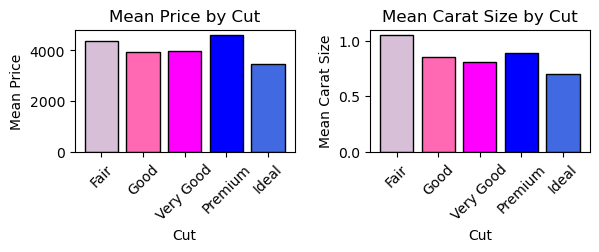

In [23]:
# Create a figure containing two side-by-side bar charts. 
# Set the figure size to [12,4].
plt.figure(figsize=[12,4])
plt.subplot(2,4,1)

# Label the x-axes as "Cut" . Label the y-axes "Mean Price" 
plt.xlabel('Cut')
plt.xticks(rotation=45) # added because labels were overlapping
plt.ylabel('Mean Price')

# The title should be "Mean Price by Cut" 
plt.title('Mean Price by Cut')

# Each chart should have a bar for every level of cut.
# The left chart should display the mean price for each level, 
# The edgecolor in each plot should be set to black.
# The color of the bars in each plot should be set according to cut_pal.
plt.bar(x=gb_cut.index, height=gb_cut.price, color=cut_pal, edgecolor='black')

# The right chart should display the mean carat size for each level. 
plt.subplot(2,4,2)
plt.bar(x=gb_cut.index, height=gb_cut.carat, color=cut_pal, edgecolor='black')
plt.xlabel('Cut')
plt.xticks(rotation=45) # added because labels were overlapping
# and "Mean Carat Size".
plt.ylabel('Mean Carat Size')
# and "Mean Carat Size by Cut".
plt.title('Mean Carat Size by Cut')

# Display the plot using plt.show().
plt.tight_layout() # added because plots were overlapping
plt.show()

## Part 9: Grouping by Color
Create a grouped DataFrame displaying the mean price and carat size for each color level.

In [24]:
# Create a new DataFrame named gb_color as follows: Select the color, price, and carat columns from diamonds,
# group the result by color, and then calculate the grouped means. 
gb_color = diamonds.loc[:, ['color', 'price', 'carat']].groupby(['color'], observed=False).mean()

# Display the resulting DataFrame.
gb_color.head()

,price,carat
color,,
J,5323.818020,1.162137
I,5091.874954,1.026927
H,4486.669196,0.911799
G,3999.135671,0.771190
F,3724.886397,0.736538


Next, use bar charts to graphically display the information from the DataFrame above.

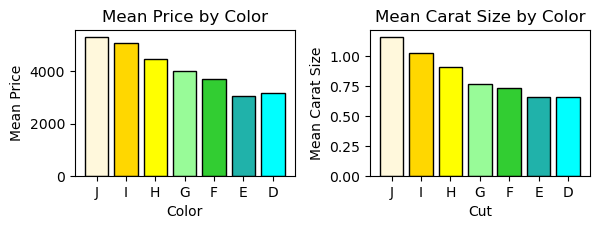

In [25]:
# Create a figure containing two side-by-side bar charts. 
# Set the figure size to [12,4].
plt.figure(figsize=[12,4])
plt.subplot(2,4,1)

# Label the x-axes as "Color" . Label the y-axes "Mean Price" 
plt.xlabel('Color')
plt.ylabel('Mean Price')

# The title should be "Mean Price by Color"
plt.title('Mean Price by Color')

# Each chart should have a bar for every level of color.
# The left chart should display the mean price for each level 
# The edgecolor in each plot should be set to black.
# The color of the bars in each plot should be set according to cut_pal.
plt.bar(x=gb_color.index, height=gb_color.price, color=color_pal, edgecolor='black')

# and the right chart should display the mean carat size for each level 
plt.subplot(2,4,2)
plt.bar(x=gb_color.index, height=gb_color.carat, color=color_pal, edgecolor='black')
plt.xlabel('Cut')
# and "Mean Carat Size".
plt.ylabel('Mean Carat Size')
# and "Mean Carat Size by Color".
plt.title('Mean Carat Size by Color')

# Display the plot using plt.show().
plt.tight_layout() # added because plots were overlapping
plt.show()

## Part 10: Grouping by Clarity
Create a grouped DataFrame displaying the mean price and carat size for each clarity level.

In [26]:
# Create a new DataFrame named gb_clarity as follows: Select the clarity, price, and carat columns from
# diamonds, group the result by clarity, and then calculate the grouped means.
gb_clarity = diamonds.loc[:, ['clarity', 'price', 'carat']].groupby(['clarity'], observed=False).mean()

# Display the resulting DataFrame.
gb_clarity.head()

,price,carat
clarity,,
I1,3924.168691,1.283846
SI2,5063.028606,1.077648
SI1,3996.001148,0.850482
VS2,3924.989395,0.763935
VS1,3839.455391,0.727158


Next, use bar charts to graphically display the information from the DataFrame above

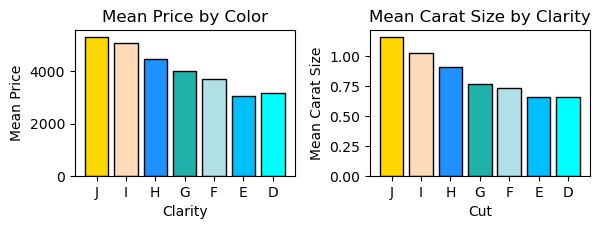

In [27]:
# Create a figure containing two side-by-side bar charts. 
# Set the figure size to [12,4].
plt.figure(figsize=[12,4])
plt.subplot(2,4,1)

# Label the x-axes as "Clarity" . Label the y-axes "Mean Price" 
plt.xlabel('Clarity')
plt.ylabel('Mean Price')

# The title should be "Mean Price by Clarity"
plt.title('Mean Price by Color')

# Each chart should have a bar for every level of clarity.
# The left chart should display the mean price for each level 
# The edgecolor in each plot should be set to black.
# The color of the bars in each plot should be set according to clarity_pal.
plt.bar(x=gb_color.index, height=gb_color.price, color=clarity_pal, edgecolor='black')

# and the right chart should display the mean carat size for each level 
plt.subplot(2,4,2)
plt.bar(x=gb_color.index, height=gb_color.carat, color=clarity_pal, edgecolor='black')
plt.xlabel('Cut')
# and "Mean Carat Size".
plt.ylabel('Mean Carat Size')
# and "Mean Carat Size by Clarity".
plt.title('Mean Carat Size by Clarity')

# Display the plot using plt.show().
plt.tight_layout() # added because plots were overlapping
plt.show()
